In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [3]:

# load dataset
df = sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [6]:

# add "affair" column: 1 represents having affairs, 0 represents not
df['affair'] = (df.affairs > 0).astype(int)

In [7]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [11]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
cf.go_offline()

In [12]:
# exploring age
df['age'].iplot(kind='hist',xTitle='Age',bins=30,bestfit=True)

In [15]:
# exploring eduction
df['educ'].iplot(kind='hist',xTitle='Education Level',bins=30)

In [16]:
# exploring marriage ratindg
df['rate_marriage'].iplot(kind='hist',xTitle='rate_marriage',bins=30,bestfit=True)

<AxesSubplot:xlabel='rate_marriage', ylabel='count'>

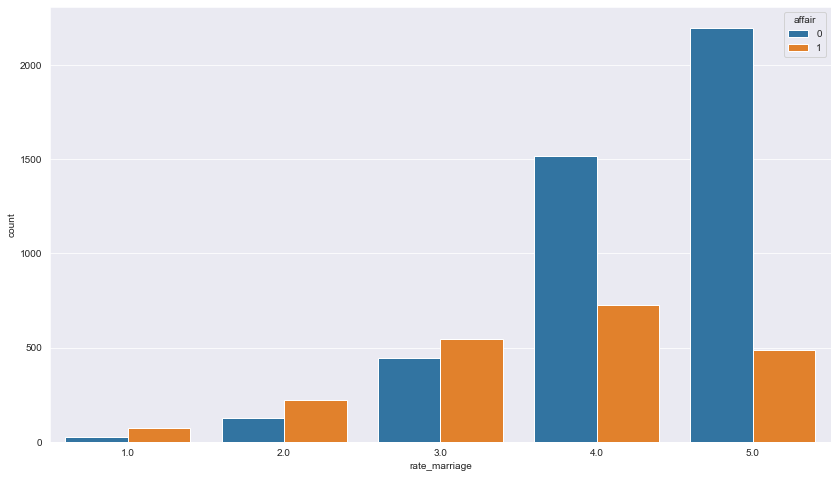

In [19]:
plt.figure(figsize=(14,8))
sns.set_style('darkgrid')
sns.countplot(data=df,x='rate_marriage',hue='affair')

<AxesSubplot:xlabel='yrs_married', ylabel='count'>

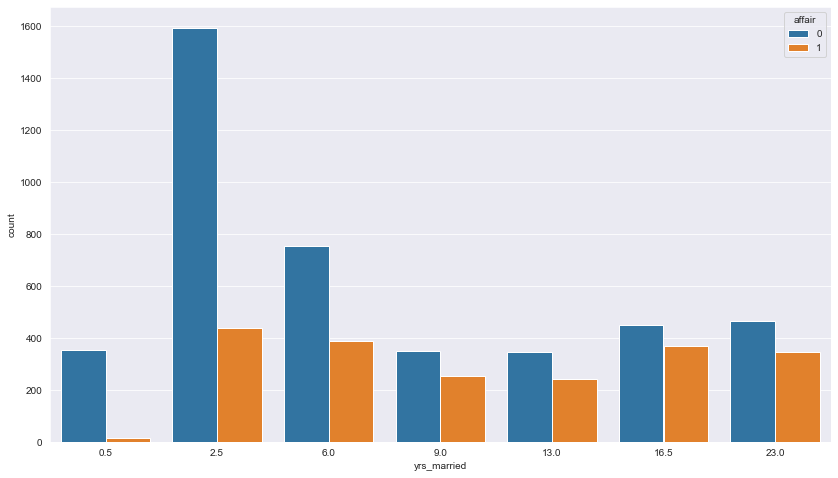

In [20]:
plt.figure(figsize=(14,8))
sns.set_style('darkgrid')
sns.countplot(data=df,x='yrs_married',hue='affair')

In [21]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [22]:
# create dataframes with an intercept column and dummy variables for
# occupation and occupation_husb
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  df, return_type="dataframe")


# rename column names for the dummy variables for better looks:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

# and flatten y into a 1-D array so that scikit-learn will properly understand it as the response variable.
y = np.ravel(y)

In [25]:
 X.columns

Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ'],
      dtype='object')

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.7252591894439209

# Model Evaluation Using a Validation Set

In [30]:
from sklearn.model_selection import train_test_split
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
model_2 = LogisticRegression()
model_2.fit(X_train, y_train)

# predict class labels for the test set
predicted = model_2.predict(X_test)
print (predicted)

# generate class probabilities
probs = model_2.predict_proba(X_test)

[0. 0. 0. ... 0. 0. 0.]


In [31]:
print(probs)

[[0.5173202  0.4826798 ]
 [0.59546617 0.40453383]
 [0.74367531 0.25632469]
 ...
 [0.95304585 0.04695415]
 [0.87017514 0.12982486]
 [0.87182611 0.12817389]]


In [32]:
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix
# generate evaluation metrics
print(accuracy_score(y_test, predicted))
print(roc_auc_score(y_test, probs[:, 1]))

0.7109947643979058
0.7291953519616101


In [33]:
print (confusion_matrix(y_test, predicted))
print (classification_report(y_test, predicted))

[[1158  119]
 [ 433  200]]
              precision    recall  f1-score   support

         0.0       0.73      0.91      0.81      1277
         1.0       0.63      0.32      0.42       633

    accuracy                           0.71      1910
   macro avg       0.68      0.61      0.61      1910
weighted avg       0.69      0.71      0.68      1910



# Model Evaluation Using Cross-Validation

In [34]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
scores, scores.mean()

(array([0.72370487, 0.69544741, 0.73626374, 0.70800628, 0.71428571,
        0.73155416, 0.72955975, 0.70754717, 0.74842767, 0.75      ]),
 0.7244796757599993)